# Density and Contour Plots

There are several methods for displaying three-dim datta in two-dims. plt.contour for contour plots, plt.contourf for filled contour plots and plt.imshow for showing images.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## Visualising a 3D Function

We want to plot **z = f(x,y)** using the following f:

In [3]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

A contour plot can be created with plt.contour. It takes three arguments, a grid of x values, a grid of y values, and a grid of z values. The x and y values represent positions, and the z values are represented by the contour levels. The easiest way to prepare the grid is to use np.meshgrid

In [4]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X,Y = np.meshgrid(x, y)
Z = f(X, Y)

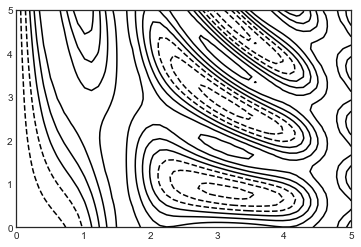

In [8]:
plt.contour(X, Y, Z, colors='black');

When a single colour is used, negative values are represented by dashed lines, and positive values by solid lines. Alternatively, lines can be colour-coded with the cmap function. Here we specify we want more lines - 20 equally spaced intervals within the data range:

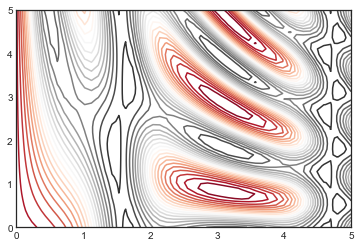

In [13]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

Here we chose RdGy, the Red-Gray colourmap. We can check which are available by doing tab completion on plt.cm.<TAB>

The lines may be a bit distracting, so we can change this by switching to a filled countour using plt.contourf(). This uses mostly the same syntax as plt.contour()

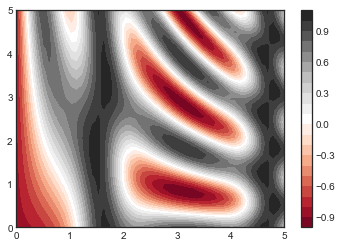

In [16]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

One potentially issue is that the graph is a bit splotchy ie the patches are discrete. We could set the number of contours to be very high, but this becomes very inefficient. plt.imshow() can do this, which interprets a two-dim grid of data as an image:

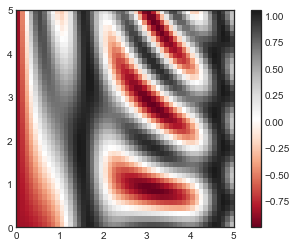

In [20]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

There are a few potential sources of confusion with plt.imshow():
- plt.imshow() doesn't accept a grid, so must manually specify the extent [xmin, xmax, ymin, ymax].
- plt.imshow() by default has the upper left as the origin which must be changed
- plt.imshow() will automatically adjust the axis aspect ratio to mathc the input data; this can be changed with plt.axis(aspect='image') to make the x and y units match

Can be useful to combine image and contour plots:

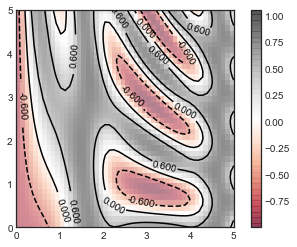

In [27]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=10)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
          cmap='RdGy', alpha=0.5)
plt.colorbar();